/tmp/ipykernel_1649/4074271319.py:7: DtypeWarning: Columns (18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("developer_dataset.csv")


Index(['RespondentID', 'Year', 'Country', 'Employment', 'UndergradMajor',
       'DevType', 'LanguageWorkedWith', 'LanguageDesireNextYear',
       'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'Hobbyist', 'OrgSize', 'YearsCodePro',
       'JobSeek', 'ConvertedComp', 'WorkWeekHrs', 'NEWJobHunt',
       'NEWJobHuntResearch', 'NEWLearn'],
      dtype='object')
RespondentID              111209
Year                      111209
Country                   111209
Employment                109425
UndergradMajor             98453
DevType                   100433
LanguageWorkedWith        102018
LanguageDesireNextYear     96044
DatabaseWorkedWith         85859
DatabaseDesireNextYear     74234
PlatformWorkedWith         91609
PlatformDesireNextYear     85376
Hobbyist                   68352
OrgSize                    54804
YearsCodePro               94793
JobSeek                    60556
ConvertedComp              91333
WorkWeekHrs           

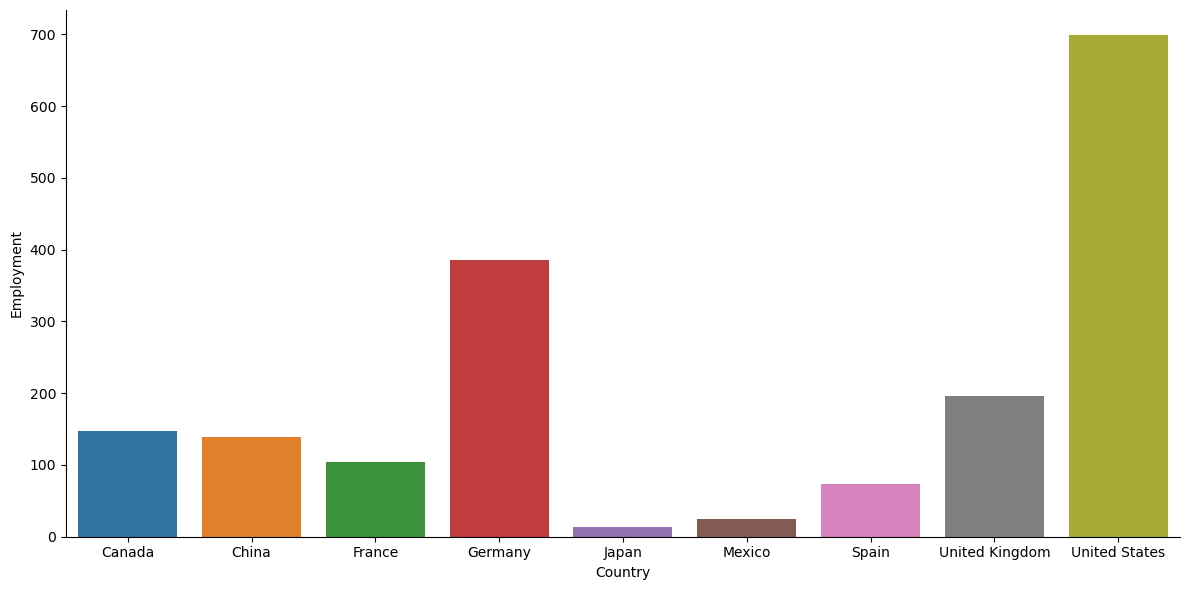

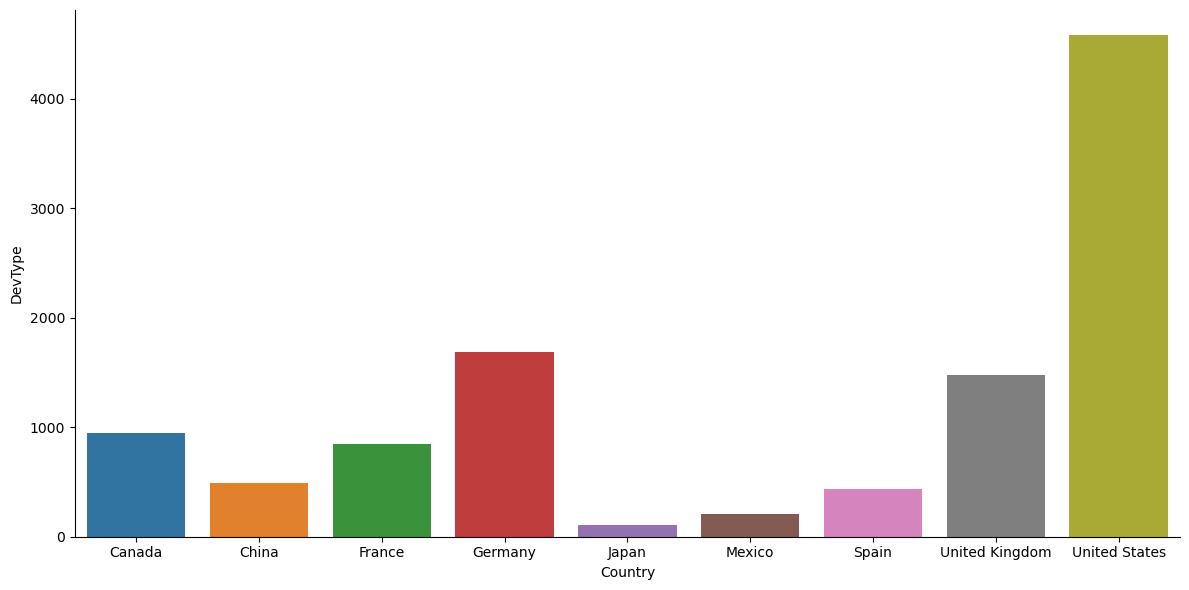

In [4]:
#Import relevant libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read data
data = pd.read_csv("developer_dataset.csv")
print(data.columns)
print(data.count())
print(data.describe())

'''
Initial analysis of data so far:

we have a total of 111209 slots of data. There's some missing
data after running data.count() and data.describe(). 

some slots like org size or new job hunt columns are missing a LOT
of people. Unlikely that stat analysis using these would be good.
Can safely remove columns with ~60% + worth of missing data
'''

maxRows = data['RespondentID'].count()
print('% missing data:')
print((1- data.count() / maxRows) * 100)

#NEWJobHunt, NEWJobHuntResearch, and NEWLearn are above 60% missing
data.drop(['NEWJobHunt','NEWJobHuntResearch', 'NEWLearn'],
    axis=1,
    inplace=True)

# check to confirm drop success
#print(f'\nafter drop: \n{data.columns}') 

#Analyze Devs by country
''' task: look at distribution of employment and dev type to country '''
#FIRST: find out missin data for each country
data[['RespondentID','Country']].groupby('Country').count()

missingData = data[['Employment','DevType']].isnull().groupby(data['Country']).sum().reset_index()

A=sns.catplot(
    data=missingData, kind="bar",
    x="Country", y="Employment",
    height = 6, aspect = 2, hue='Country')
B=sns.catplot(
    data=missingData, kind="bar",
    x="Country", y="DevType",
    height = 6, aspect = 2, hue='Country')

data.dropna(subset = ['Employment','DevType'],
    inplace = True,
    how = 'any')

/tmp/ipykernel_1649/3916569770.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  devdf.loc[devdf['DevType'].str.contains('back-end'), 'BackEnd'] = True
/tmp/ipykernel_1649/3916569770.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  devdf.loc[devdf['DevType'].str.contains('front-end'), 'FrontEnd'] = True
/tmp/ipykernel_1649/3916569770.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

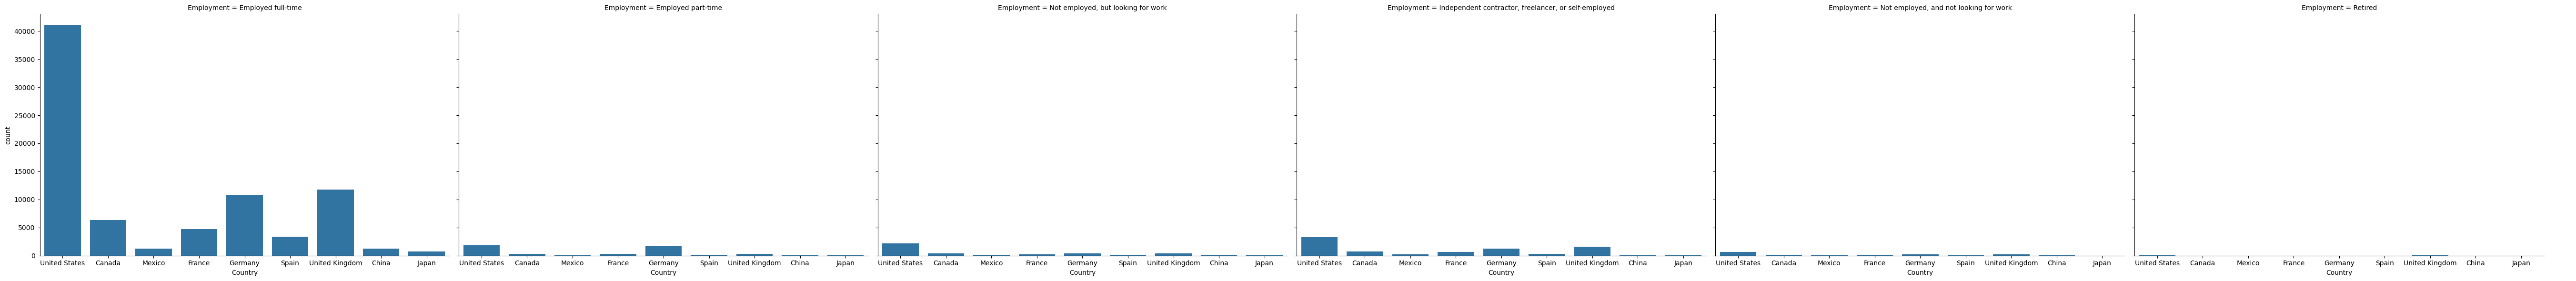

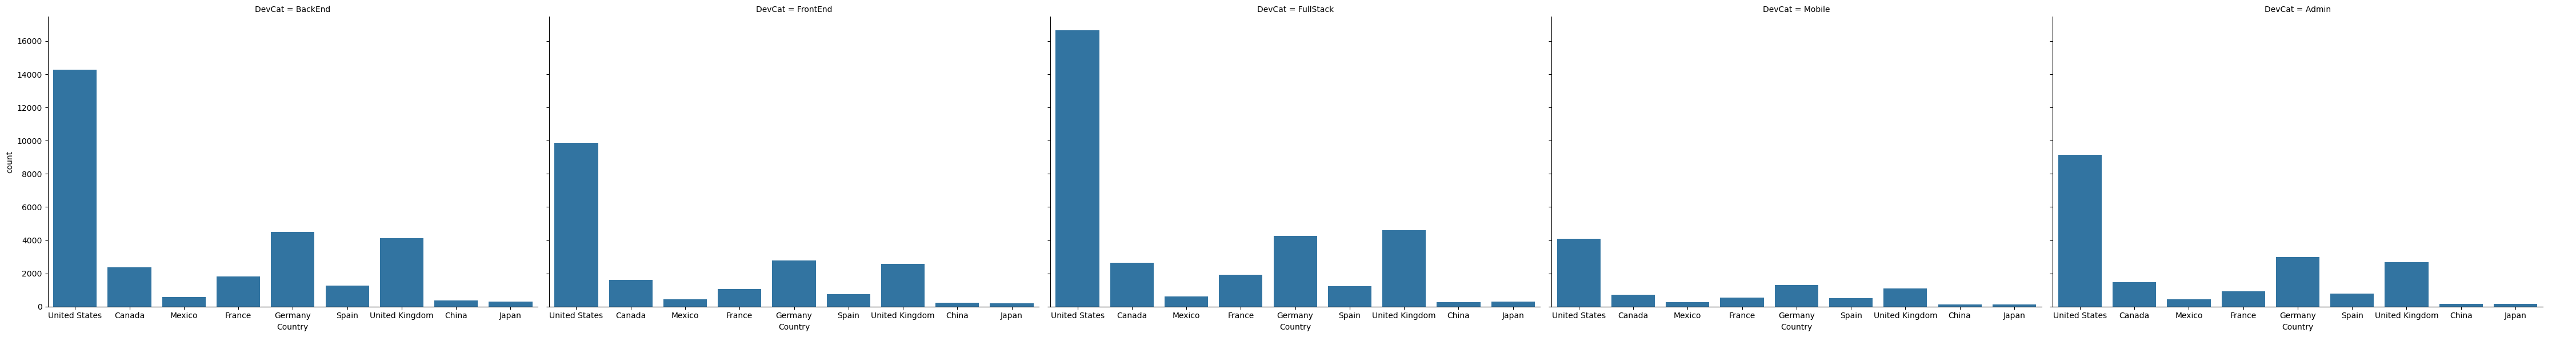

In [5]:
empfig = sns.catplot(x="Country", col="Employment",
                data=data, kind="count",
                height=6, aspect=1.5);

# Focus on a few of the key developer types outlined in the Stack Overflow survey
devdf = data[['Country','DevType']]
devdf.loc[devdf['DevType'].str.contains('back-end'), 'BackEnd'] = True
devdf.loc[devdf['DevType'].str.contains('front-end'), 'FrontEnd'] = True
devdf.loc[devdf['DevType'].str.contains('full-stack'), 'FullStack'] = True
devdf.loc[devdf['DevType'].str.contains('mobile'), 'Mobile'] = True
devdf.loc[devdf['DevType'].str.contains('administrator'), 'Admin'] = True

devdf = devdf.melt(id_vars=['Country'], 
    value_vars=['BackEnd','FrontEnd','FullStack','Mobile','Admin'], 
    var_name='DevCat',
    value_name='DevFlag')

devdf.dropna(how='any', inplace=True)

devFig = sns.catplot(x="Country", col="DevCat",
                data=devdf, kind="count",
                height=6, aspect=1.5);

/tmp/ipykernel_1649/4051971972.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['UndergradMajor'].bfill(axis=0, inplace=True)
/tmp/ipykernel_1649/4051971972.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edudf.dropna(how='any', inplace=True)
/tmp/ipykernel_1649/4051971972.py:17: SettingWithCopyWarning: 
A value is trying to be s

<Axes: title={'center': 'EduCat = SocialScience'}, xlabel='Year', ylabel='YearsCodePro'>

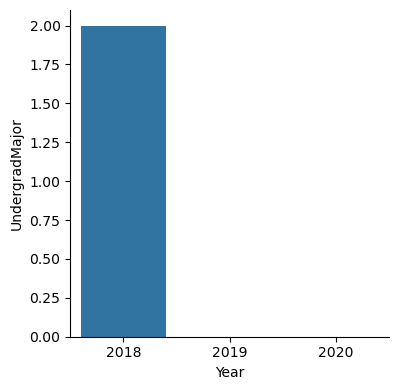

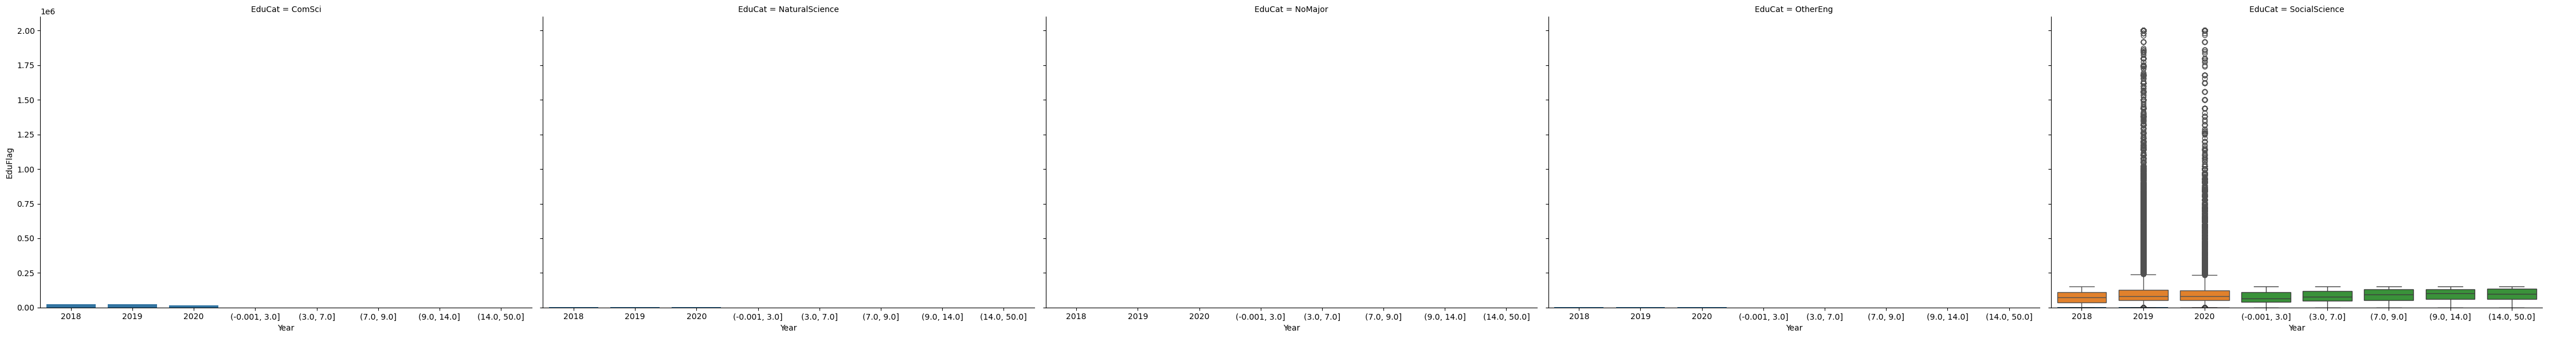

In [9]:
missingUndergrad = data['UndergradMajor'].isnull().groupby(data['Year']).sum().reset_index()

sns.catplot(x="Year", y="UndergradMajor",
                data=missingUndergrad, kind="bar",
                height=4, aspect=1);

# Sort by ID and Year so that each person's data is carried backwards correctly
data = data.sort_values(['RespondentID','Year'])

data['UndergradMajor'].bfill(axis=0, inplace=True)

# Key major groups outlined in the Stack Overflow survey
majors = ['social science','natural science','computer science','development','another engineering','never declared']

edudf = data[['Year','UndergradMajor']]
edudf.dropna(how='any', inplace=True)
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)social science'), 'SocialScience'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)natural science'), 'NaturalScience'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)computer science'), 'ComSci'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)development'), 'ComSci'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)another engineering'), 'OtherEng'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)never declared'), 'NoMajor'] = True

edudf = edudf.melt(id_vars=['Year'], 
    value_vars=['SocialScience','NaturalScience','ComSci','OtherEng','NoMajor'], 
    var_name='EduCat',
    value_name='EduFlag')

edudf.dropna(how='any', inplace=True)
edudf = edudf.groupby(['Year','EduCat']).count().reset_index()

eduFig = sns.catplot(x="Year", y='EduFlag', col="EduCat",
                data=edudf, kind="bar",
                height=6, aspect=1.5);

compFields = data[['Year','YearsCodePro','ConvertedComp']]

D = sns.boxplot(x="Year", y="YearsCodePro",
            data=compFields)

E = sns.boxplot(x="Year", y="ConvertedComp",
            data=compFields)

import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split

imputedf = data[['YearsCodePro','ConvertedComp']]

traindf, testdf = train_test_split(imputedf, train_size=0.1)

# Create the IterativeImputer model to predict missing values
imp = IterativeImputer(max_iter=20, random_state=0)

# Fit the model to the the test dataset
imp.fit(imputedf)

# Transform the model on the entire dataset
compdf = pd.DataFrame(np.round(imp.transform(imputedf),0), columns=['YearsCodePro','ConvertedComp'])

compPlotdf = compdf.loc[compdf['ConvertedComp'] <= 150000]
compPlotdf['CodeYearBins'] = pd.qcut(compPlotdf['YearsCodePro'], q=5)

sns.boxplot(x="CodeYearBins", y="ConvertedComp",
            data=compPlotdf)